# Classification Models Practice

Here are some resources to look for a dataset if you want to practice classification algorithms.

- [Kaggle](https://kaggle.com) 
- [Data World](https://data.world/datasets/data)
- [Google Dataset Search](https://datasetsearch.research.google.com/)

Today, we will look into how to approach classification problems and come up with a business problem. We will also look into 
- building a baseline model, 
- improving its performance using hyperparameter tuning
- providing some insights into the model if possible

# Dataset: Pima Indians Diabetes

We will be using a toy dataset for today's guided practice. A toy dataset is a small standard dataset that is generally used for benchmarking algorithms or just getting everything set up quickly. Here is a [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to the dataset page. Since this dataset is a very simple dataset, we will not have many problems we usually need to deal with here and this dataset requires very minimal preprocessing

**Attribute Information:**

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1)

# Business case

The business problem here can be a governmental health agency trying to understand the leading causes of diabetes and trying to decide potential advertisements for educating the public and raise awareness. It could also be about predicting which groups of population might be at risk of diabetes and ensuring good preventive measures are instituted as soon as possible.

Doctor trying to build a machine learning model to predict whether a person has diabetes


## Define true positives, false positives, true negatives and false negatives

0 -> Healthy
1 -> Diabetes

True positives - We say they have diabetes and they do
False positive - We say they have diabetes and they do not
True negatives - We say they don't have diabetes and they do not
False negatives - We say they don't have diabetes and they do

## Question - Comment on the metric you think will be most valuable to look at 

We would want to focus most on Recall, as it is okay to say someone has diabetes when they do not, instead of not identifying it/

# Code 

The code is included below this point. Here are the steps we will follow
- Import libraries and data
- Basic EDA
- Baseline Model
- Hyperparameter Tuning
- Building a pipeline

## Imports 

In [1]:
#libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix

In [2]:
data = pd.read_csv("diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Quick observations:

1. All datatypes look good for modeling ie no object
2. No missing values
3. Target variable is outcome

In [3]:
#display first 5 rows of df
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#check class imbalance
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
#get a quick idea about the data -> summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# comment about the class imbalance, will it affect the results and do we need
# to do anything about it
# We will have more negative samples

## EDA

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

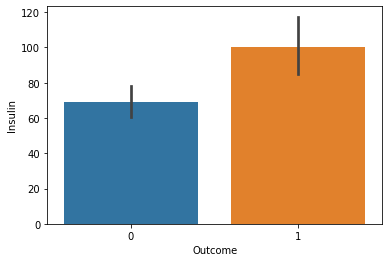

In [27]:
#do 3 EDA plots
sns.barplot(x = 'Outcome', y = 'Insulin',data = data)


<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

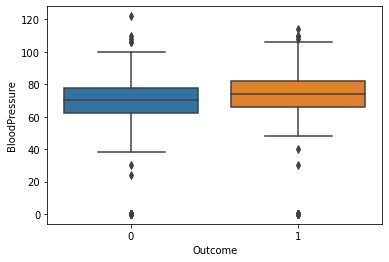

In [28]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure',data = data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

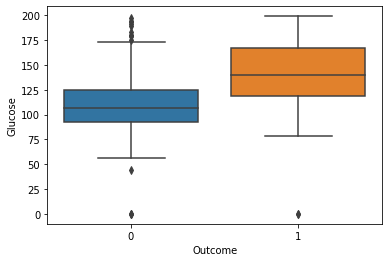

In [29]:
sns.boxplot(x = 'Outcome', y = 'Glucose',data = data)

## Logistic Regression Model

In [42]:
#do a test train split
X = data.drop(columns = 'Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 2)

In [43]:
#build a baseline model 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

C:\Users\jniegocki\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
#get predicitions from baseline
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

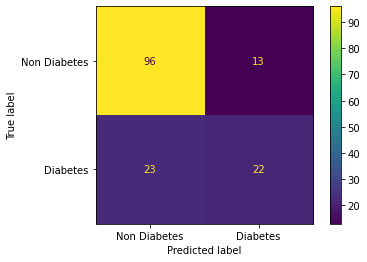

In [45]:
#build a confusion matrix and classification report
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['Non Diabetes', 'Diabetes'])


In [51]:
print(classification_report(y_test, test_pred, target_names=['Healthy', 'Diabetes']))

              precision    recall  f1-score   support

     Healthy       0.81      0.88      0.84       109
    Diabetes       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



# Decision Tree Model

In [46]:
#define a decision tree
decclass = DecisionTreeClassifier(random_state=2)


In [47]:
#fit the model
decclass.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
#get predictions from the model
classpreds = decclass.predict(X_test)
classtrain = decclass.predict(X_train)

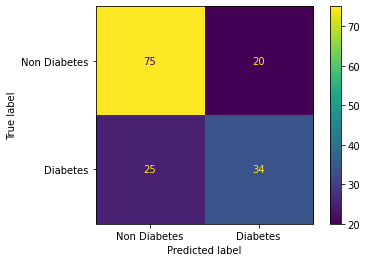

In [41]:
#print confusion matrix and classification report
plot_confusion_matrix(decclass, X_test, y_test, display_labels=['Non Diabetes', 'Diabetes'])


In [53]:
print(classification_report(y_test, classpreds, target_names=['Not Diabetes', 'Diabetes']))
print(classification_report(y_train, classtrain, target_names=['Not Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

Not Diabetes       0.84      0.79      0.82       109
    Diabetes       0.56      0.64      0.60        45

    accuracy                           0.75       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154

              precision    recall  f1-score   support

Not Diabetes       1.00      1.00      1.00       391
    Diabetes       1.00      1.00      1.00       223

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [ ]:
#comment about the fit of the model
#The model is heavily overfit

## Pruning the decision tree

In [54]:
#prune the decision tree using the max_depth
decclass = DecisionTreeClassifier(max_depth=3 ,random_state=2)


In [55]:
#get predicitions from the pruned model
decclass.fit(X_train, y_train)
classpreds = decclass.predict(X_test)
classtrain = decclass.predict(X_train)

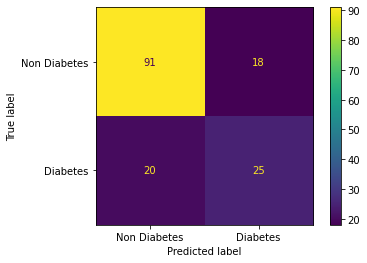

In [56]:
#print confusion matrix and classification report
plot_confusion_matrix(decclass, X_test, y_test, display_labels=['Non Diabetes', 'Diabetes'])


In [57]:
print(classification_report(y_test, classpreds, target_names=['Not Diabetes', 'Diabetes']))
print(classification_report(y_train, classtrain, target_names=['Not Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

Not Diabetes       0.82      0.83      0.83       109
    Diabetes       0.58      0.56      0.57        45

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154

              precision    recall  f1-score   support

Not Diabetes       0.81      0.85      0.83       391
    Diabetes       0.72      0.65      0.68       223

    accuracy                           0.78       614
   macro avg       0.76      0.75      0.76       614
weighted avg       0.78      0.78      0.78       614



In [58]:
#comment about the fit of the model
# It is no longer perfect on the training data but does have a better overall recall than the prior model
# It is not a great model for this situation and more work would be needed.